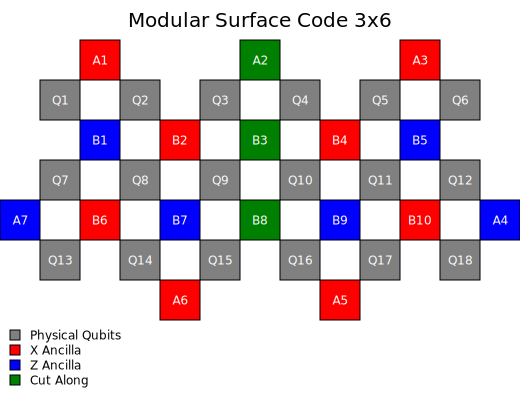

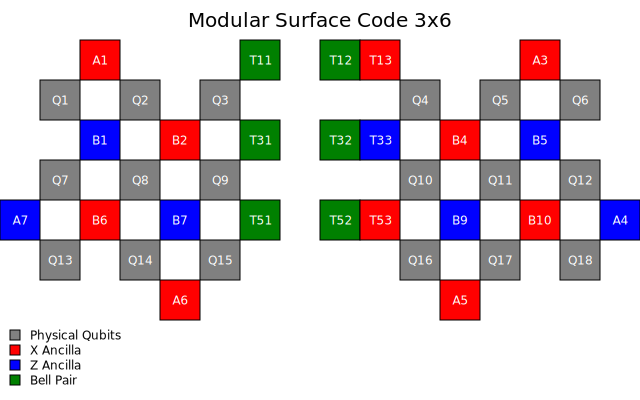

QUBIT_COORDS(0, 2) 11
QUBIT_COORDS(0, 6) 311
QUBIT_COORDS(0, 8) 312
QUBIT_COORDS(0, 9) 313
QUBIT_COORDS(0, 13) 13
QUBIT_COORDS(1, 1) 41
QUBIT_COORDS(1, 3) 42
QUBIT_COORDS(1, 5) 43
QUBIT_COORDS(1, 10) 44
QUBIT_COORDS(1, 12) 45
QUBIT_COORDS(1, 14) 46
QUBIT_COORDS(2, 2) 21
QUBIT_COORDS(2, 4) 22
QUBIT_COORDS(2, 6) 331
QUBIT_COORDS(2, 8) 332
QUBIT_COORDS(2, 9) 333
QUBIT_COORDS(2, 11) 24
QUBIT_COORDS(2, 13) 25
QUBIT_COORDS(3, 1) 47
QUBIT_COORDS(3, 3) 48
QUBIT_COORDS(3, 5) 49
QUBIT_COORDS(3, 10) 410
QUBIT_COORDS(3, 12) 411
QUBIT_COORDS(3, 14) 412
QUBIT_COORDS(4, 0) 17
QUBIT_COORDS(4, 2) 26
QUBIT_COORDS(4, 4) 27
QUBIT_COORDS(4, 6) 351
QUBIT_COORDS(4, 8) 352
QUBIT_COORDS(4, 9) 353
QUBIT_COORDS(4, 11) 29
QUBIT_COORDS(4, 13) 210
QUBIT_COORDS(4, 15) 14
QUBIT_COORDS(5, 1) 413
QUBIT_COORDS(5, 3) 414
QUBIT_COORDS(5, 5) 415
QUBIT_COORDS(5, 10) 416
QUBIT_COORDS(5, 12) 417
QUBIT_COORDS(5, 14) 418
QUBIT_COORDS(6, 4) 16
QUBIT_COORDS(6, 11) 15
R 11 311 312 313 13 41 42 43 44 45 46 21 22 331 332 333 24 25 4

In [1]:
from Surface import surface_data 
from generate_circuit import generate_circuit
# Generate the data takes inputs(n,m,c,spacing,display_svg)    n,m dimensions c: cut position spacing&display_svg
data = surface_data(3, 6, 3, 3, display_svg=True)

circuit = generate_circuit(data, 0.01,0.1,3)
print(circuit)


LATEST UPDATE: Included Observable   
Switched Z and X roles   
TO DO: 1- When using Vecdec there seems to be an issue with circuit distance that I am still figuring it out   
(Compare to manual circuit -- 3*5 --> distance was 5)   
Also, PyMatching was unable to decode manual circuit


Distance Problem Fixed   
PyMatching Can Decode!   
Distance is still the longest dimension!   

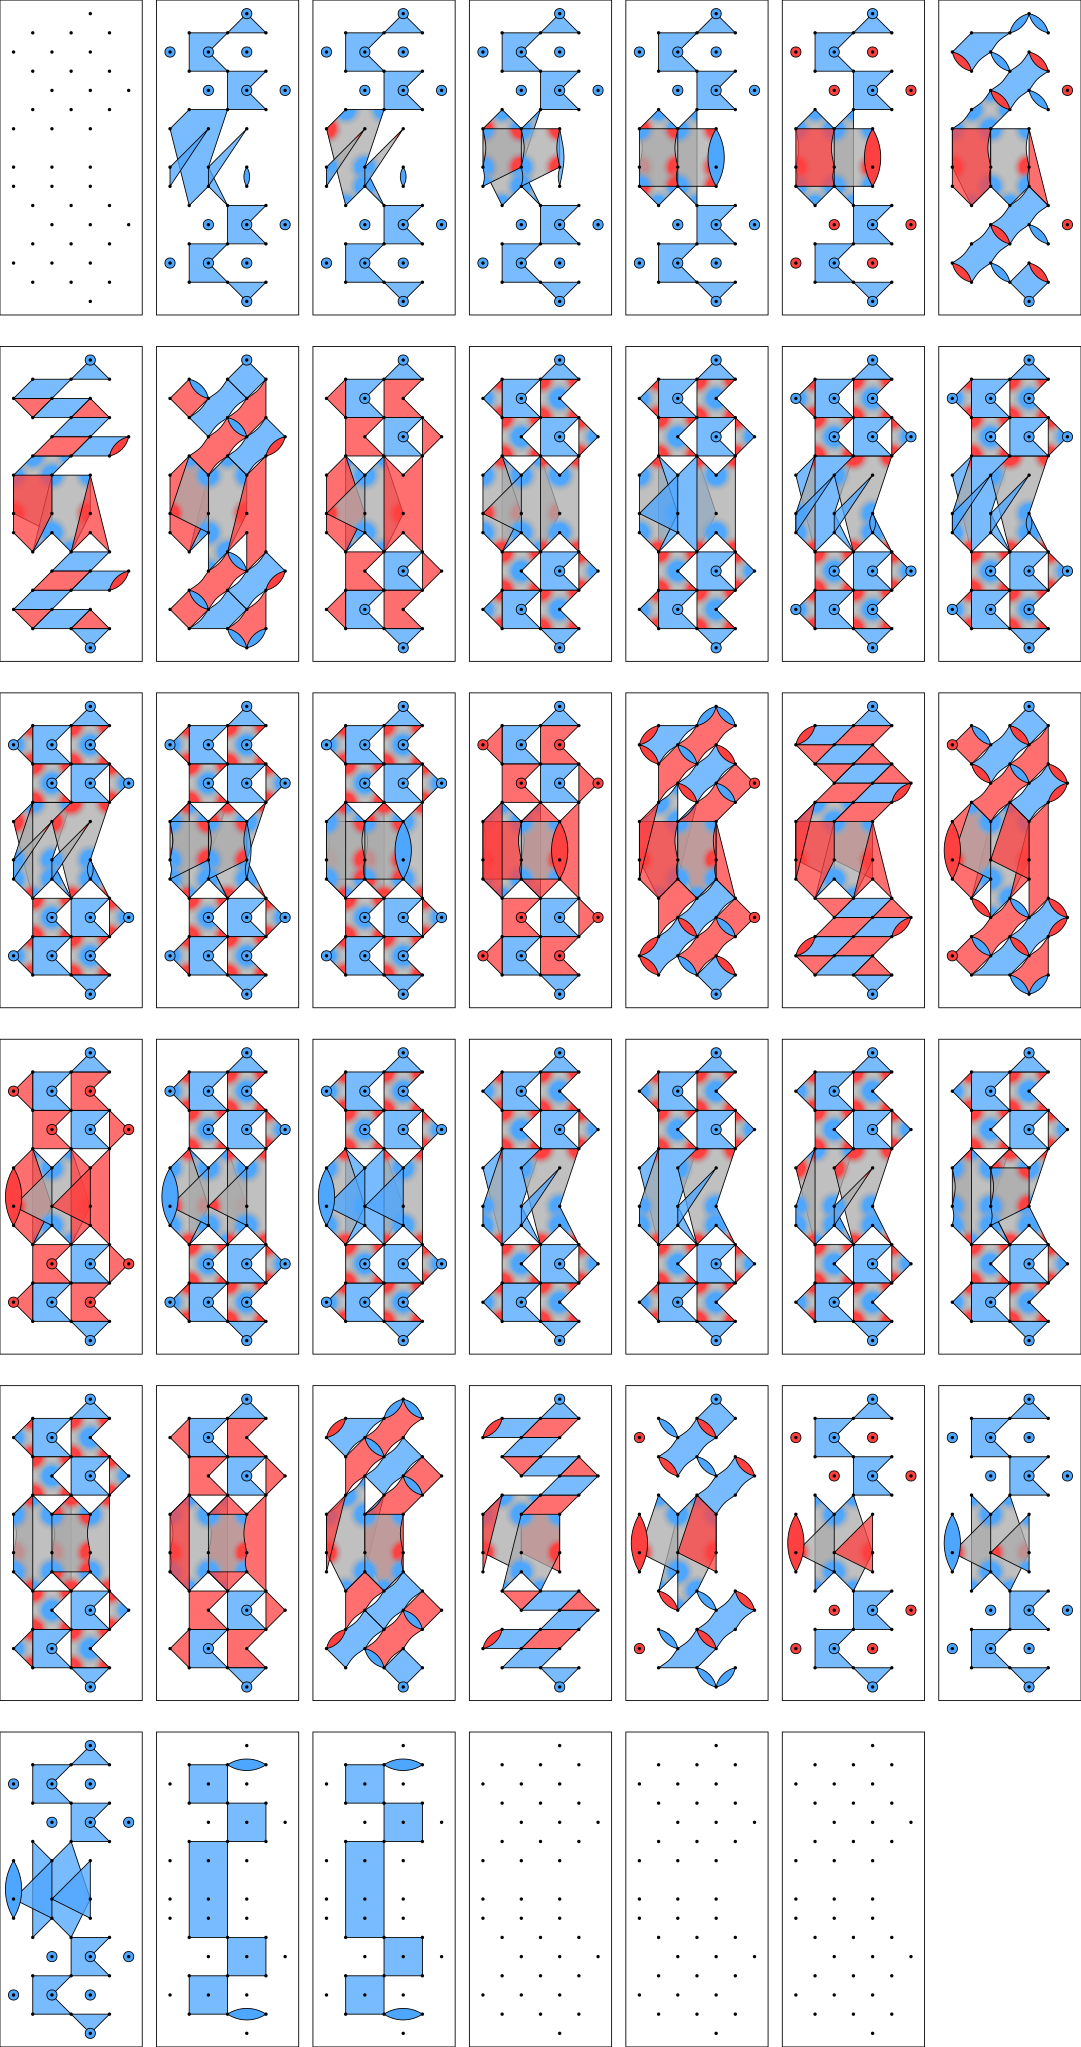

In [2]:
circuit.diagram('detslice-svg')

In [2]:
dem = circuit.detector_error_model()
print(dem)

error(0.02101172802650805) D0
error(0.009304831745666962) D0 D2
error(0.009304831745666962) D0 D4
error(0.01972584190227753) D0 D7
error(0.004005357180252828) D0 D7 D18
error(0.004005357180252828) D0 D11
error(0.001338700097173321) D0 D11 D18
error(0.00797862858822285) D0 D18
error(0.02101172802650805) D1
error(0.01192888888888882) D1 D3
error(0.005333333333333313) D1 D3 D15
error(0.009304831745666962) D1 D5
error(0.01908160489091348) D1 D8
error(0.0006697986788568588) D1 D8 D15
error(0.002006705456917236) D1 D8 D15 D19
error(0.002006705456917236) D1 D8 D19
error(0.002006705456917236) D1 D10
error(0.002006705456917236) D1 D10 D15
error(0.0006697986788568588) D1 D10 D15 D19
error(0.0006697986788568588) D1 D10 D19
error(0.002673815958446298) D1 D15
error(0.002673815958446298) D1 D15 D19
error(0.005333333333333313) D1 D19
error(0.002006705456917236) D2
error(0.01192888888888882) D2 D6
error(0.005333333333333313) D2 D6 D14
error(0.005995987492949032) D2 D7
error(0.0006697986788568588) D2 D

In [13]:
from typing import List
import sinter 

# Generate the data
def my_circuit(n,noise,noise2):
    data = surface_data(n, 2*n, n, 3,display_svg=False)
    circuit = generate_circuit(data, noise,noise2,n)
    return circuit

noise2= 0.15

surface_code_tasks = [
    sinter.Task(
        circuit= my_circuit(d,noise,noise2),
        json_metadata={'d': d, 'r': d, 'p': noise},
    )
    for d in [3, 5, 7]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012,0.05]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=True,
)

Starting 4 workers...
18 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=972800   errors_left=3988    {d=3,p=0.008,r=3}
    pymatching processes=0  ~core_mins_left=2       shots_left=999700   errors_left=4980    {d=3,p=0.009,r=3}
    pymatching processes=0  ~core_mins_left=2       shots_left=999700   errors_left=4981    {d=3,p=0.01,r=3}
    pymatching processes=0  ~core_mins_left=5       shots_left=999900   errors_left=4993    {d=3,p=0.011,r=3}
17 cases left:
    pymatching processes=3  ~core_mins_left=1       shots_left=943300   errors_left=2458    {d=3,p=0.009,r=3}
    pymatching processes=1  ~core_mins_left=1       shots_left=991900   errors_left=4559    {d=3,p=0.01,r=3}
    pymatching processes=0  ~core_mins_left=5       shots_left=999900   errors_left=4993    {d=3,p=0.011,r=3}
16 cases left:
    pymatching processes=1  ~core_mins_left=1       shots_left=950756   errors_left=2440    {d=3,p=0.01,r=3}
    pymatching processes=1  ~core_mins_left=1       shot

[sinter.TaskStats(strong_id='83b444fc3ef2206c165c7744e003f2e0ea8cee24679aaa12bd524f8dc6ea0398', decoder='pymatching', json_metadata={'d': 3, 'r': 3, 'p': 0.01}, shots=96727, errors=5000, seconds=2.4829999998910353), sinter.TaskStats(strong_id='5c4db0058830c80d137270aecd7346a39e91cc824dbe43fd3b56a96b3db4d6f6', decoder='pymatching', json_metadata={'d': 3, 'r': 3, 'p': 0.009}, shots=111551, errors=5095, seconds=2.8109999999869615), sinter.TaskStats(strong_id='7c3afc2d01716ef94da4ecee726f294497ee374a4d1b08e5d345dae578d48b42', decoder='pymatching', json_metadata={'d': 3, 'r': 3, 'p': 0.008}, shots=138026, errors=5001, seconds=3.1570000000065193), sinter.TaskStats(strong_id='98c985014832312ce7033f2c8fca7247b08395c0007847c845be67362b63e5d9', decoder='pymatching', json_metadata={'d': 3, 'r': 3, 'p': 0.011}, shots=78940, errors=5008, seconds=2.1110000000335276), sinter.TaskStats(strong_id='53f1c5b72bc5c3b6a6b297620f92aa8d4bfbe6625fae6c0e83dedcc6e31465ba', decoder='pymatching', json_metadata={'d

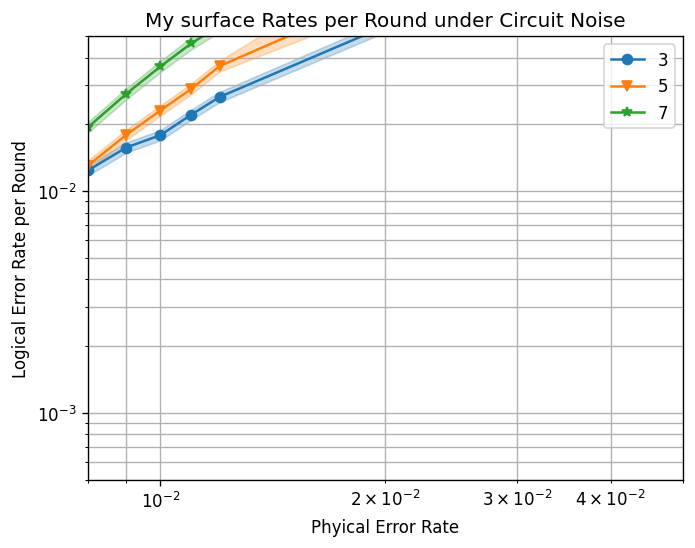

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
)
ax.set_ylim(5e-4, 5e-2)
ax.set_xlim(0.008, 0.05)
ax.loglog()
ax.set_title("My surface Rates per Round under Circuit Noise")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger
print(collected_surface_code_stats)

In [ ]:
import stim
d=3
noise= 0.01
circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=d * 3,
    distance=d,
    after_clifford_depolarization=noise,
    after_reset_flip_probability=noise,
    before_measure_flip_probability=noise,
    before_round_data_depolarization=noise,
),

print(circuit)

(stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(1, 3) 8
    QUBIT_COORDS(2, 2) 9
    QUBIT_COORDS(3, 3) 10
    QUBIT_COORDS(4, 2) 11
    QUBIT_COORDS(5, 3) 12
    QUBIT_COORDS(6, 2) 13
    QUBIT_COORDS(0, 4) 14
    QUBIT_COORDS(1, 5) 15
    QUBIT_COORDS(2, 4) 16
    QUBIT_COORDS(3, 5) 17
    QUBIT_COORDS(4, 4) 18
    QUBIT_COORDS(5, 5) 19
    QUBIT_COORDS(4, 6) 25
    R 1 3 5 8 10 12 15 17 19
    X_ERROR(0.01) 1 3 5 8 10 12 15 17 19
    R 2 9 11 13 14 16 18 25
    X_ERROR(0.01) 2 9 11 13 14 16 18 25
    TICK
    DEPOLARIZE1(0.01) 1 3 5 8 10 12 15 17 19
    H 2 11 16 25
    DEPOLARIZE1(0.01) 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    DEPOLARIZE2(0.01) 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    DEPOLARIZE2(0.01) 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    DEPOLARIZE2(0.01) 16 10 11 5 25 19 8 9 17 18 12